In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score


In [6]:
df = pd.read_csv('Pakistan House Prices.csv')
print("Shape:", df.shape)
df.head(10)

Shape: (168446, 18)


,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,agency,agent,Total_Area,date_added
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,NaN,NaN,1089.004,2/4/2019
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,NaN,NaN,15246.056,5/4/2019
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,NaN,NaN,2178.008,7/17/2019
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,NaN,NaN,10890.000,4/5/2019
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008,7/10/2019
5,5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,For Sale,8,NaN,NaN,87120.000,4/5/2019
6,6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,For Sale,8,NaN,NaN,5445.000,1/4/2019
7,7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,For Sale,2,Ettemad Enterprises,Balqiaz Marwat,16879.562,5/5/2019
8,8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,For Sale,7,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,5445.000,10/19/2018
9,9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,For Sale,5,Crown Associate,Abrar Ahmed,5445.000,6/27/2019


In [7]:
print(df.dtypes)
print("\nMissing values (top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))
display(df.describe(include='all').T)

Unnamed: 0         int64
property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
purpose           object
bedrooms           int64
agency            object
agent             object
Total_Area       float64
date_added        object
dtype: object

Missing values (top 20):
agent            44072
agency           44071
property_id          0
Unnamed: 0           0
location_id          0
page_url             0
location             0
city                 0
property_type        0
price                0
latitude             0
province_name        0
longitude            0
baths                0
bedrooms             0
purpose              0
Total_Area           0
date_added           0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,168446.0,NaN,NaN,NaN,84222.5,48626.316059,0.0,42111.25,84222.5,126333.75,168445.0
property_id,168446.0,NaN,NaN,NaN,15596255.48967,2251206.866687,86575.0,14883201.75,16658506.0,17086619.75,17357718.0
location_id,168446.0,NaN,NaN,NaN,4375.936395,3776.561581,1.0,1058.0,3286.0,7220.0,14220.0
page_url,168446,168446,https://www.zameen.com/Property/bahria_town_ka...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,168446,7,House,105468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,168446.0,NaN,NaN,NaN,17765759.832219,35310032.317856,0.0,175000.0,8500000.0,19500000.0,2000000000.0
location,168446,1509,DHA Defence,22046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,168446,5,Karachi,60484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province_name,168446,3,Punjab,70536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,168446.0,NaN,NaN,NaN,29.859519,3.80787,11.052446,24.948536,31.459784,33.560887,73.184088


In [8]:
df = df.dropna(subset=['price'])
df = df.dropna()
print("Shape after dropping rows with any missing values:", df.shape)

# Save cleaned CSV for reproducibility
CLEAN_PATH = "/content/Cleaned_Pakistan_House_Prices.csv"
df.to_csv(CLEAN_PATH, index=False)
print("Saved cleaned CSV to", CLEAN_PATH)

Shape after dropping rows with any missing values: (124374, 18)
Saved cleaned CSV to /content/Cleaned_Pakistan_House_Prices.csv


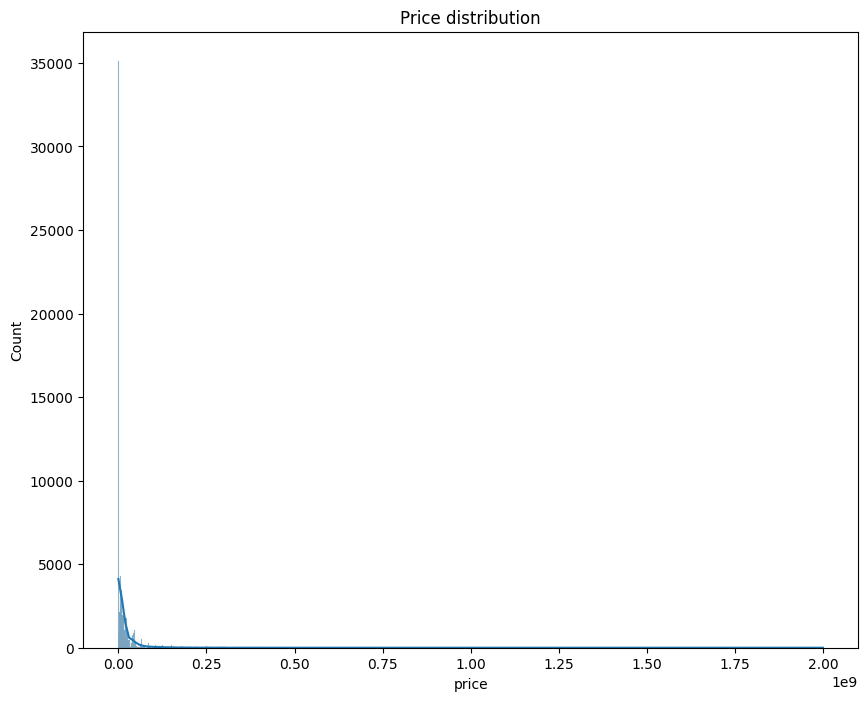

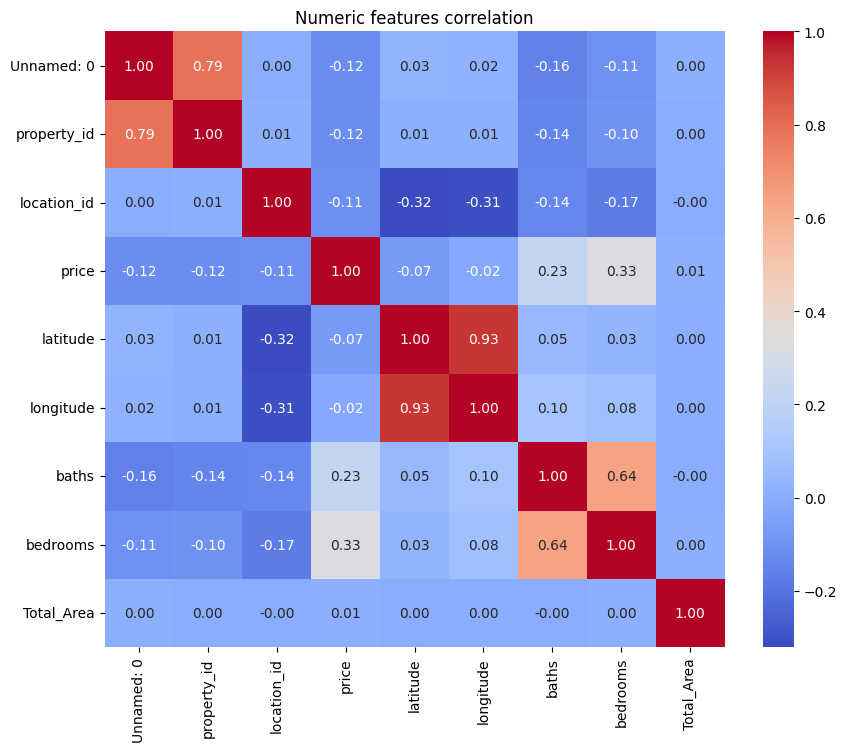

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(df['price'], kde=True)
plt.title('Price distribution')
plt.show()

num = df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric features correlation')
plt.show()


In [10]:
numeric_features = df.select_dtypes(include='number').columns.tolist()
if 'price' in numeric_features:
    numeric_features.remove('price')
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical example:", categorical_features[:10])

Numeric features: ['Unnamed: 0', 'property_id', 'location_id', 'latitude', 'longitude', 'baths', 'bedrooms', 'Total_Area']
Categorical example: ['page_url', 'property_type', 'location', 'city', 'province_name', 'purpose', 'agency', 'agent', 'date_added']


In [11]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Remove sparse=False
], remainder='drop')

X = df[numeric_features + categorical_features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (99499, 17) Test: (24875, 17)


In [8]:
from sklearn.metrics import root_mean_squared_error

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = {}
for name, m in models.items():
    pipe = Pipeline([('pre', preprocessor), ('model', m)])
    print(f"\nTraining {name} ...")
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)  # Use the dedicated function
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

import pprint
pprint.pprint(results)


Training LinearRegression ...

Training RandomForest ...

Training GradientBoosting ...
{'GradientBoosting': {'MAE': 8073657.106600915,
                      'R2': 0.6376415670787998,
                      'RMSE': 23005962.156696294},
 'LinearRegression': {'MAE': 11805925.736783225,
                      'R2': 0.44572466795093324,
                      'RMSE': 28453388.260157116},
 'RandomForest': {'MAE': 3114871.0960418093,
                  'R2': 0.8152758209759636,
                  'RMSE': 16426047.985755173}}


Saved model to /content/best_model.joblib
Saved metrics to /content/model_results.txt


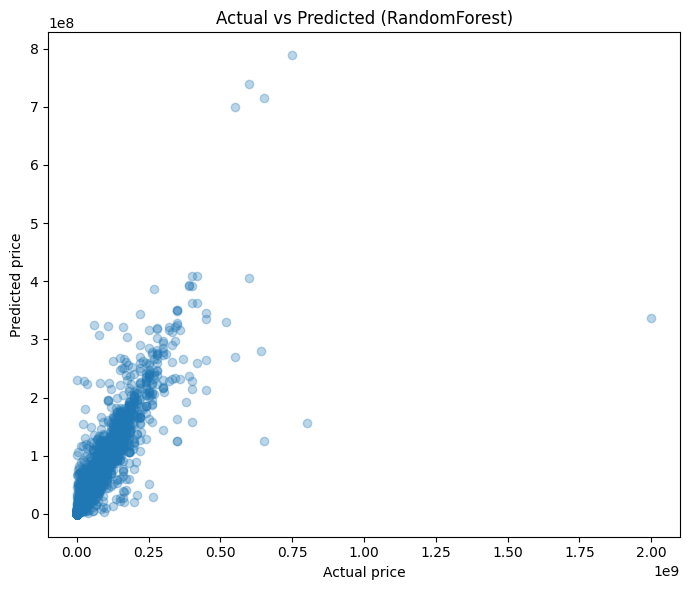

Saved plot to /content/price_prediction_plot.png


In [13]:
# Import required libraries
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# retrain RF on full train set and save pipeline (or pick the best model from results)
best_pipe = Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])
best_pipe.fit(X_train, y_train)
joblib.dump(best_pipe, '/content/best_model.joblib')
print("Saved model to /content/best_model.joblib")

# Save metrics
with open('/content/model_results.txt', 'w') as f:
    for k,v in results.items():
        f.write(f"{k}: MAE={v['MAE']:.4f}, RMSE={v['RMSE']:.4f}, R2={v['R2']:.4f}\n")
print("Saved metrics to /content/model_results.txt")

# Save predicted vs actual plot
plt.figure(figsize=(7,6))
plt.scatter(y_test, best_pipe.predict(X_test), alpha=0.3)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted (RandomForest)")
plt.tight_layout()
plt.savefig('/content/price_prediction_plot.png', dpi=150)
plt.show()
print("Saved plot to /content/price_prediction_plot.png")

In [12]:
bins = df['price'].quantile([0.33, 0.66]).values
labels = ['Low', 'Medium', 'High']
df['price_cat'] = pd.cut(df['price'], bins=[-np.inf, bins[0], bins[1], np.inf], labels=labels)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Xc = df[numeric_features + categorical_features]
yc = df['price_cat']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
clf_pipe = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))])
clf_pipe.fit(Xc_train, yc_train)
pc = clf_pipe.predict(Xc_test)
print("Classification accuracy:", accuracy_score(yc_test, pc))
print(classification_report(yc_test, pc))


Classification accuracy: 0.9370452261306532
              precision    recall  f1-score   support

        High       0.94      0.94      0.94      8403
         Low       0.99      0.95      0.97      8256
      Medium       0.89      0.92      0.91      8216

    accuracy                           0.94     24875
   macro avg       0.94      0.94      0.94     24875
weighted avg       0.94      0.94      0.94     24875

